In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **chapter 2**

### Plotting Figure 2.3

C:\Users\AESPINA\AppData\Local\Temp\ipykernel_7604\415988273.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("environmental_modeling\chapter2\le98temp.dat", delim_whitespace=True, header=None)


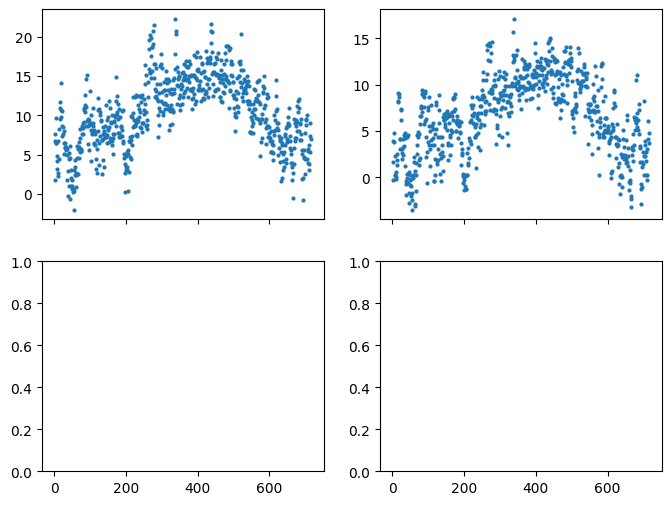

In [3]:
# Reading the .dat file
df = pd.read_csv("environmental_modeling\chapter2\le98temp.dat", delim_whitespace=True, header=None)
df.columns = [["register", "datetime", "max_temp", "min_temp"]]

x = df.register
y1 = df.max_temp
y2 = df.min_temp

# Create the grid of subplots, here in the nrows and n cols 
# we can control the grid distribution. 
fig, ax = plt.subplots(
    nrows = 2, 
    ncols = 2, 
    figsize = (8,6), 
    sharex = True
)

# first plot
ax[(0,0)].plot(x, y1, marker = "o", linestyle = "", markersize = 2)

# second plot
ax[(0,1)].plot(x, y2, marker = "o", linestyle = "", markersize = 2)


plt.show()

In [13]:
df.head()

,register,datetime,max_temp,min_temp
0,1,19980101T0900,1.8,-0.3
1,2,19980101T2100,7.7,1.6
2,3,19980102T0900,6.8,3.9
3,4,19980102T2100,6.5,3.8
4,5,19980103T0900,9.7,4.8


### Elevation model DEM

In [7]:
# Loading elevation data
df = pd.read_csv("environmental_modeling\chapter2\efyrnwy.dem", delim_whitespace=True, header=None)


C:\Users\AESPINA\AppData\Local\Temp\ipykernel_7604\338026250.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("environmental_modeling\chapter2\efyrnwy.dem", delim_whitespace=True, header=None)


ParserError: Error tokenizing data. C error: Expected 3 fields in line 163, saw 5


C:\Users\AESPINA\AppData\Local\Temp\ipykernel_7604\2592009219.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(r"environmental_modeling\chapter2\le98temp.dat",


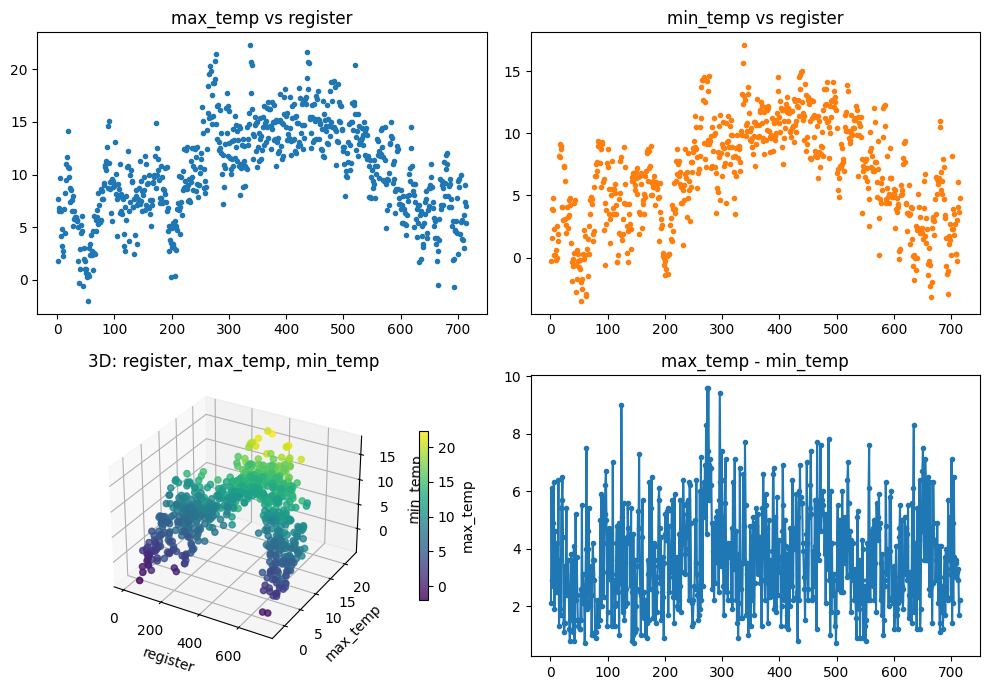

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # not used directly but enables 3d projection

# Reading the .dat file (same as yours)
df = pd.read_csv(r"environmental_modeling\chapter2\le98temp.dat",
                 delim_whitespace=True, header=None)
df.columns = ["register", "datetime", "max_temp", "min_temp"]

x = df.register.values
y1 = df.max_temp.values
y2 = df.min_temp.values

# Create an empty array to hold axes objects and a Figure
fig = plt.figure(figsize=(10, 7))
ax = np.empty((2, 2), dtype=object)

# Fill the grid manually so we can mix 2D and 3D axes
ax[(0, 0)] = fig.add_subplot(2, 2, 1)  # 2D
ax[(0, 0)].plot(x, y1, marker="o", linestyle="", markersize=3)
ax[(0, 0)].set_title("max_temp vs register")

ax[(0, 1)] = fig.add_subplot(2, 2, 2)  # 2D
ax[(0, 1)].plot(x, y2, marker="o", linestyle="", markersize=3, color="C1")
ax[(0, 1)].set_title("min_temp vs register")

# Make the bottom-left subplot a 3D axes
ax[(1, 0)] = fig.add_subplot(2, 2, 3, projection="3d")  # 3D
# 3D scatter of (register, max_temp, min_temp)
sc = ax[(1, 0)].scatter(x, y1, y2, c=y1, cmap="viridis", s=20, alpha=0.8)
ax[(1, 0)].set_xlabel("register")
ax[(1, 0)].set_ylabel("max_temp")
ax[(1, 0)].set_zlabel("min_temp")
ax[(1, 0)].set_title("3D: register, max_temp, min_temp")
fig.colorbar(sc, ax=ax[(1, 0)], shrink=0.6, pad=0.1, label="max_temp")

# Bottom-right: simple difference plot
ax[(1, 1)] = fig.add_subplot(2, 2, 4)
ax[(1, 1)].plot(x, y1 - y2, marker="o", linestyle="-", markersize=3)
ax[(1, 1)].set_title("max_temp - min_temp")

plt.tight_layout()
plt.show()